In [4]:
import pandas as pd

data = pd.read_json("jsondata.json")  



In [5]:
df = pd.DataFrame(data)
print(df.head())

  end_year intensity       sector        topic  \
0                  6       Energy          gas   
1                  6       Energy          oil   
2                  6       Energy  consumption   
3                  6  Environment          oil   
4                  6                    market   

                                             insight  \
0                              Annual Energy Outlook   
1                              Annual Energy Outlook   
2                              Annual Energy Outlook   
3  WRI Partnership Aims to Foster Supply Chain Tr...   
4  N-Hexane Market Hit at a CAGR of 5% by 2024 - ...   

                                                 url            region  \
0  http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...  Northern America   
1  http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...  Northern America   
2  http://www.eia.gov/outlooks/aeo/pdf/0383(2017)...  Northern America   
3  http://www.sustainablebrands.com/news_and_view...   Central Ame

In [12]:
df.replace("", None, inplace=True)
df.info


<bound method DataFrame.info of     end_year intensity              sector        topic  \
0       None         6              Energy          gas   
1       None         6              Energy          oil   
2       None         6              Energy  consumption   
3       None         6         Environment          oil   
4       None         6                None       market   
..       ...       ...                 ...          ...   
995     None         2  Financial services          oil   
996     2016      None       Manufacturing       growth   
997     None        16                None       growth   
998     2016         3              Retail       export   
999     None         2                None         None   

                                               insight  \
0                                Annual Energy Outlook   
1                                Annual Energy Outlook   
2                                Annual Energy Outlook   
3    WRI Partnership Aims t

In [13]:
df['added'] = pd.to_datetime(df['added'])
df['published'] = pd.to_datetime(df['published'])


In [14]:
df['intensity'] = pd.to_numeric(df['intensity'])
df['likelihood'] = pd.to_numeric(df['likelihood'])
df['relevance'] = pd.to_numeric(df['relevance'])


In [15]:
df.info


<bound method DataFrame.info of     end_year  intensity              sector        topic  \
0       None        6.0              Energy          gas   
1       None        6.0              Energy          oil   
2       None        6.0              Energy  consumption   
3       None        6.0         Environment          oil   
4       None        6.0                None       market   
..       ...        ...                 ...          ...   
995     None        2.0  Financial services          oil   
996     2016        NaN       Manufacturing       growth   
997     None       16.0                None       growth   
998     2016        3.0              Retail       export   
999     None        2.0                None         None   

                                               insight  \
0                                Annual Energy Outlook   
1                                Annual Energy Outlook   
2                                Annual Energy Outlook   
3    WRI Partne

In [16]:
print(df.describe())


        intensity                          added  \
count  962.000000                           1000   
mean    10.238046  2016-10-15 17:18:49.362999808   
min      1.000000            2016-07-03 05:28:48   
25%      4.000000  2016-08-17 02:50:20.750000128   
50%      8.000000     2016-10-19 01:39:56.500000   
75%     12.000000            2016-12-14 03:24:09   
max     96.000000            2017-01-20 03:51:25   
std      9.588543                            NaN   

                           published   relevance  likelihood  
count                            926  999.000000  962.000000  
mean   2016-08-26 23:00:54.427645696    2.729730    3.165281  
min              2007-07-01 00:00:00    1.000000    1.000000  
25%              2016-07-14 00:00:00    2.000000    2.000000  
50%              2016-09-26 00:00:00    3.000000    3.000000  
75%              2016-11-30 00:00:00    4.000000    4.000000  
max              2020-04-01 00:00:00    7.000000    4.000000  
std                        

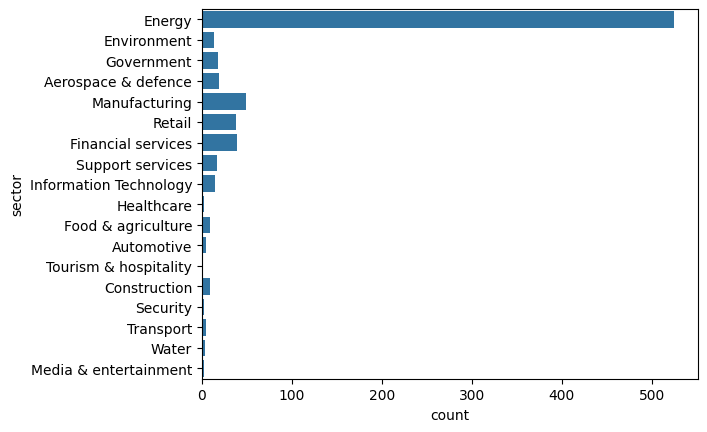

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="sector", data=df)
plt.show()


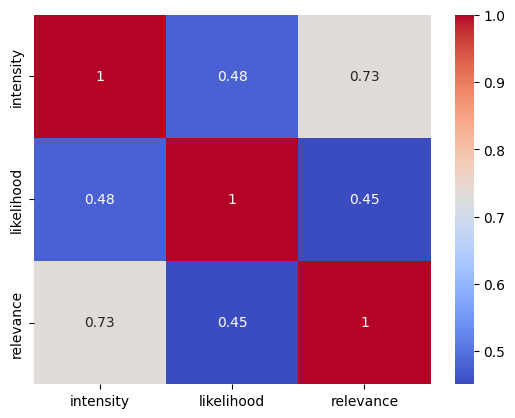

In [18]:
sns.heatmap(df[['intensity', 'likelihood', 'relevance']].corr(), annot=True, cmap='coolwarm')
plt.show()


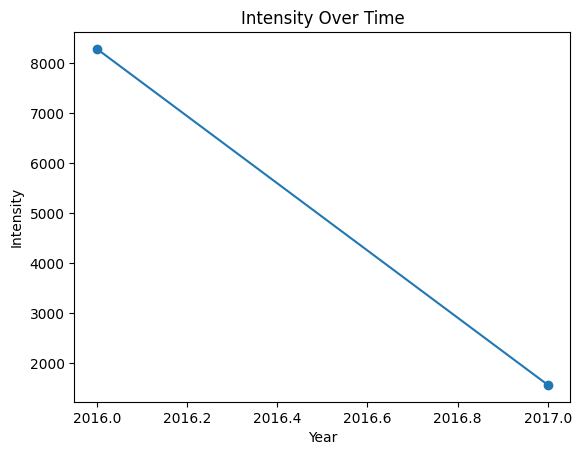

In [19]:
df['year_added'] = df['added'].dt.year
df.groupby('year_added')['intensity'].sum().plot(kind='line', marker='o')
plt.title("Intensity Over Time")
plt.xlabel("Year")
plt.ylabel("Intensity")
plt.show()


In [20]:
df.to_csv("cleaned_insights_data.csv", index=False)
